In [85]:
import numpy as np
import random
import matplotlib.pyplot as plt

def sqdistance(x, y):
    return (x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2

a = np.array([[2, 8], [2, 5], [1, 2], [5, 8], [7, 3], [6, 4], [8, 4], [4, 7]])
clusters = 3
n = len(a)

c = np.zeros(n)
p = np.zeros((clusters, 2))

In [86]:
for i in range(n):
    c[i] = random.randint(0, clusters - 1)

for i in range(clusters):
    p[i] = np.average(a[c == i], axis=0)

print('Starting c =', c, 'p =\n', p)

Starting c = [2. 2. 1. 2. 2. 2. 2. 0.] p =
 [[4.         7.        ]
 [1.         2.        ]
 [5.         5.33333333]]


In [87]:
maxiters = 5
for k in range(maxiters):
    for i in range(n):
        center = 0
        for j in range(clusters):
            if sqdistance(p[j], a[i]) < sqdistance(p[center], a[i]):
                center = j
        c[i] = center
    for i in range(clusters):
        p[i] = np.average(a[c == i], axis=0)
    cost = 0
    for i in range(n):
        cost += sqdistance(a[i], p[round(c[i])])
    cost /= n
    print('After iteration ', k + 1, ', cost = ', cost, ' c = ', c, ', p =\n', p, sep = '')

After iteration 1, cost = 1.9270833333333333 c = [0. 0. 1. 0. 2. 2. 2. 0.], p =
[[3.25       7.        ]
 [1.         2.        ]
 [7.         3.66666667]]
After iteration 2, cost = 1.9270833333333333 c = [0. 0. 1. 0. 2. 2. 2. 0.], p =
[[3.25       7.        ]
 [1.         2.        ]
 [7.         3.66666667]]
After iteration 3, cost = 1.9270833333333333 c = [0. 0. 1. 0. 2. 2. 2. 0.], p =
[[3.25       7.        ]
 [1.         2.        ]
 [7.         3.66666667]]
After iteration 4, cost = 1.9270833333333333 c = [0. 0. 1. 0. 2. 2. 2. 0.], p =
[[3.25       7.        ]
 [1.         2.        ]
 [7.         3.66666667]]
After iteration 5, cost = 1.9270833333333333 c = [0. 0. 1. 0. 2. 2. 2. 0.], p =
[[3.25       7.        ]
 [1.         2.        ]
 [7.         3.66666667]]


In [88]:
print('Result: p =\n', p, sep = '')

Result: p =
[[3.25       7.        ]
 [1.         2.        ]
 [7.         3.66666667]]


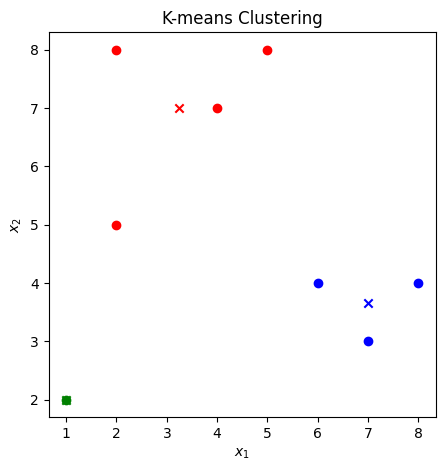

In [89]:
colors = ['red', 'green', 'blue']

fig, ax = plt.subplots(figsize=(5, 5))
for i in range(3):
    plt.scatter(a[c == i, 0], a[c == i, 1], marker='o', c=colors[i])
    plt.scatter(p[i][0], p[i][1], marker='x', c=colors[i])
plt.title('K-means Clustering')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()